In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random
import dataframe_image as dfi

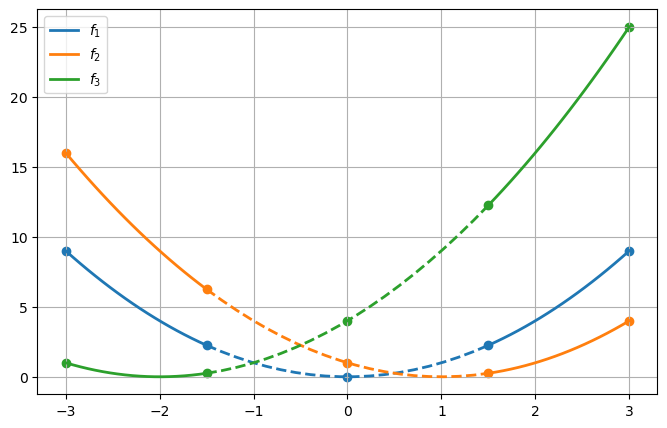

In [15]:
# Скрыть код
import matplotlib.pyplot as plt

def parabola(x, a):
    return (x - a) ** 2

l, m, r = [-3.0, -1.5], 0.0, [1.5, 3.0]
x_i = [np.linspace(l[0], l[1], 20), np.array([m]), np.linspace(r[0], r[1], 20), np.linspace(l[1], r[0], 20)]
f_1 = [parabola(x_, 0.0) for x_ in x_i]
f_2 = [parabola(x_, 1.0) for x_ in x_i]
f_3 = [parabola(x_, -2.0) for x_ in x_i]
f_s = [f_1[i] + f_2[i] + f_3[i] for i in range(4)]
x_min = [0.0, 1.5, -2.0]
colors = ['tab:blue', 'tab:orange', 'tab:green']
labels = [r'$f_1$', r'$f_2$', r'$f_3$']

plt.figure(figsize=(8, 5))

for f_v, lbl, c in zip([f_1, f_2, f_3], labels, colors):
    plt.plot(x_i[0], f_v[0], c=c, label=lbl, lw=2.0)
    plt.plot(x_i[2], f_v[2], c=c, lw=2.0)
    x_pt = [x_i[0][0], x_i[0][-1], x_i[1][0], x_i[2][0], x_i[2][-1]]
    f_pt = [f_v[0][0], f_v[0][-1], f_v[1][0], f_v[2][0], f_v[2][-1]]
    plt.scatter(x_pt, f_pt, c=c)
    plt.plot(x_i[3], f_v[3], linestyle='--', c=c, lw=2.0) 
plt.grid()
plt.legend()
plt.savefig('./images/parabolas.png')
plt.show()


In [7]:
# решение задачи с разрывом в области определения с помощью cvxpy
import cvxpy as cp

X1, Y1 = 0.0, 0.0
X2, Y2 = 1.0, 2.0
K = 1.5

# задаем одну переменную x
X = cp.Variable(1)
Y_ = 1.0

# целевая функция - корни из суммы квадратов - являются выпуклыми
objective = cp.sqrt(cp.square(X - X1) + cp.square(Y_ - Y1) ** 2) +\
            cp.sqrt(cp.square(X2 - X) + cp.square(Y2 - Y_) ** 2)

# здесь единственное ограничение - это диапазон для x
constraints = []
constraints.extend([X >= 0.0, X <= X2])

# объявляем оптимизационную задачу, здесь берем минимизацию целевой функции
problem = cp.Problem(cp.Minimize(objective), constraints)

# совершаем проверку задачи на выпуклость согласно правилам DCP
print(f"is dcp: {problem.is_dcp()}")

is dcp: False


In [11]:
# скорректируем целевую функцию через вызов norm
objective = cp.norm(cp.hstack([X - X1, Y_ - Y1]), 2) + K * cp.norm(cp.hstack([X2 - X, Y2 - Y_]), 2)

# формируем ограничения и формируем задачу
constraints = []
constraints.extend([X >= 0.0, X <= X2])
problem = cp.Problem(cp.Minimize(objective), constraints)

# проверка на выпуклость
print(f"is dcp: {problem.is_dcp()}")

# решаем задачу путем вызова солвера ECOS
sol = problem.solve('ECOS')

# извлекаем решение
x_opt = X.value[0]
X_ = x_opt
print(f"Решение: x = {round(x_opt, 3)}, f = {round(sol, 2)}")

is dcp: True
Решение: x = 0.623, f = 2.78


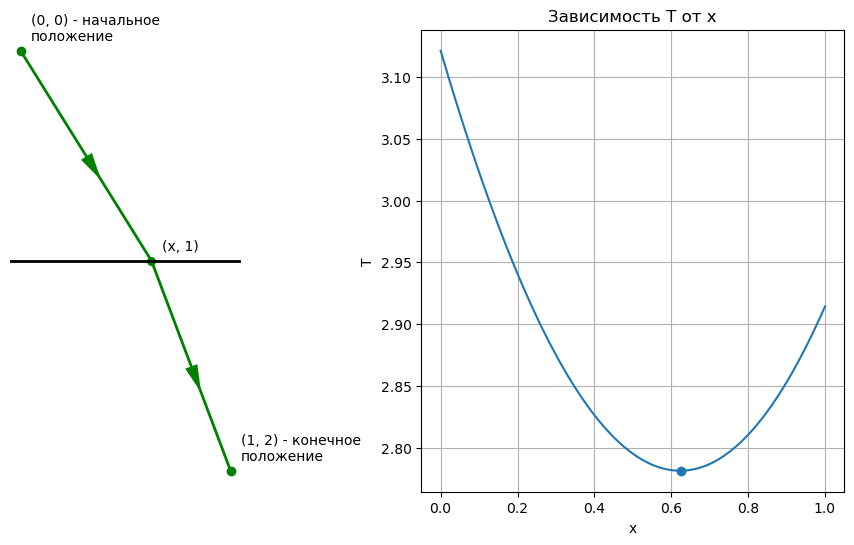

In [12]:
lw = 2.
k = 1.5

fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=100)
# traj
axes[0].plot([X1, X_], [Y1, Y_], c='g', lw=lw)
axes[0].arrow(X1, Y1, 0.5 * (X_ - X1), 0.5 * (Y_ - Y1), head_width=0.07, head_length=0.15, color='g', ec='w')
axes[0].scatter([X1], [Y1], marker='o', c='green')
axes[0].plot([X_, X2], [Y_, Y2], c='g', lw=lw)
axes[0].arrow(X_, Y_, 0.5 * (X2 - X_), 0.5 * (Y2 - Y_), head_width=0.07, head_length=0.15, color='g', ec='w')
axes[0].scatter([X2], [Y2], marker='o', c='green')
axes[0].scatter([X_], [Y_], marker='o', c='green', s=30)

axes[0].axhline(Y_, X1, X2, lw=2, c='k')

axes[0].annotate('(0, 0) - начальное\nположение', (0.05, -0.05))
axes[0].annotate('(x, 1)', (X_ + 0.05, 0.95))
axes[0].annotate('(1, 2) - конечное\nположение', (1.0 + 0.05, 1.95))


axes[0].set_aspect('equal', adjustable='box')
axes[0].axis('off')
axes[0].invert_yaxis()
axes[0].grid()

# func
def dist(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)
    
x = np.linspace(0.0, 1.0, 100)
t = dist(0, 0, x, 1) + k * dist(x, 1, 1, 2)
axes[1].plot(x, t)
axes[1].grid()
axes[1].set_xlabel('x')
axes[1].set_ylabel('T')
axes[1].set_title('Зависимость T от x')
i_opt = np.argmin(t)
x_opt = x[i_opt]
t_opt = t[i_opt]
axes[1].scatter(x_opt, t_opt)
plt.savefig('./images/cvxpy_example.png')
plt.show()
